# ASSIGNMENT 1
#### Almanik Balingga - PYTN-KI-001
#### almanik.work@gmail.com

### 0. Persiapan Library dan Loading Dataset

Sebelum memulai proses analisis, langkah paling awal yang harus dilakukan adalah menyiapkan alat dan bahan. Dalam hal ini alatnya adalah segala **library** yang diperlukan serta bahannya adalah **data** yang akan digunakan.
<br>
Library yang akan digunakan diantaranya adalah : **numpy, pandas, matlotlib, wordcloud, dan folium**

In [1]:
# Library Olah Data
import numpy as np
import pandas as pd

#Library Visualisasi
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image as im
from wordcloud import ImageColorGenerator
import folium
import seaborn as sns
%matplotlib inline

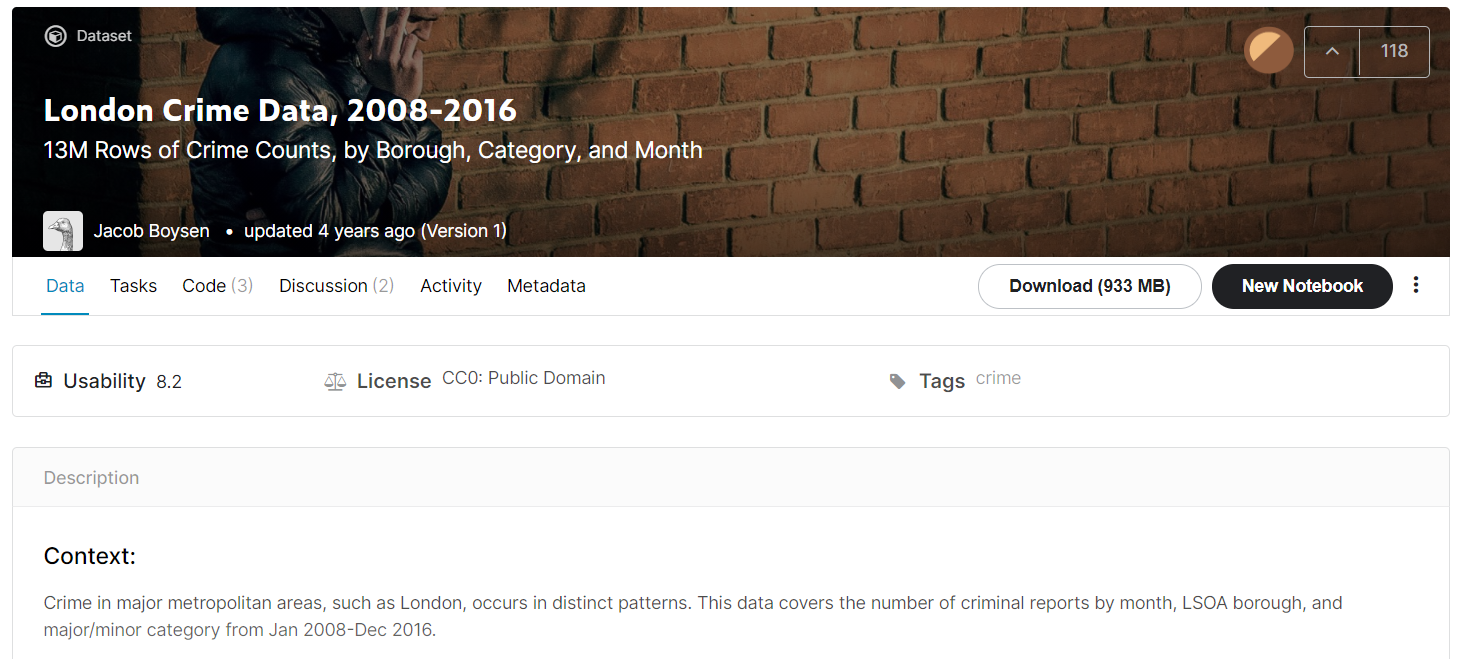

Setelah library disiapkan, selanjutnya kita akan mencoba me load dataset yang akan digunakan, dalam hal ini dataset yang akan digunakna adalah dataset **"london_crime_by_lsoa.csv"** yang merupakan sebauh dataset catatan kasus kriminal di kota london pada periode 2008 s.d. 2012

In [33]:
# meloading data yang kan digunakan
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')

Langkah selanjutnya adalah memeriksa data kita apakah sudah ter-load dengan baik atau tidak. Cara paling mudah untuk mengetahuinya adalah dengan cara memeriksa head dan tail atau 5 data teratas dan terakhir dari dataset kita

In [34]:
df.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

In [30]:
df.tail()

lsoa_code     borough               major_category  \
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
13490599  Criminal Damage To Dwelling      0  2015      2  
13490600            Personal Property      1  2015      6  
13490601       Burglary in a Dwelling      0  2011      2  
13490602            Business Property      0  2011      5  
13490603                 Wounding/GBH      0  2015      6

Semua sudah terload dengan baik. Kita sudah siap untuk memulai analisis data. <br>
Tetapi sebelum memlai analisis, salah satu hal penting yang harus dilakukan adalah pengecekan null value pada data

In [4]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Ternyata setelah dilakukan pengecekan, tidak ada null value terdeteksi pada dataset. <br><br>
Selanjutnya kita bisa memulai analisis data!

### 1. Wilayah Mana yang Memiliki Catatan Kasus Kriminal Tertinggi (2008-2016)?

Untuk memulai analisis ini, saya akan melontarkan sebuah pertanyaan, **"Wilayah mana yang memiliki catatan kasus kriminal tertinggi?"**

In [5]:
df['borough'].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

Jika dilihat dari segi kemunculan data, Croydon terhitung sebagai wilayah dengan kemunculan tertinggi dalam dataset ini. tetapi hal tersebut **tidak mencerminkan jumlah angka kriminal** yang terjadi di daerah itu. untuk mengetahuinya kita bisa mencari datanya berdasarkan kolom **"value"**, karena kolom inilah yang menyimpan data jumlah kasus yang terjadi pad suatu wilayah di satu bulan tertentu. <br>
Sebelum itu, alangkah baiknya kita mengetahui jumlah wilayah yang ada di London.

In [6]:
print("Jumlah Wilayah :",len(df['borough'].value_counts().index))

Jumlah Wilayah : 33


Ternyata terdapat 33 wilayah yang ada, Selanjutnya kita bisa mulai menganalisis wilayah mana yang memiliki kasus terbanyak. Untuk memulainya kita harus mengetahui jumlah kasus dari tiap wilayah yang ada.

In [7]:
df3 = df.groupby(['borough'])['value'].sum()

Karena outputnya dalam bentuk series, dengan nama wilayah sebagai indexnya, maka untuk mempermudah visualisasi, Saya akan mengubah terlebih dahulu bentuk dataframenya agar lebih mudah divisualkan dengan mereset iindexnya.

In [8]:
df3.reset_index()

borough   value
0     Barking and Dagenham  149447
1                   Barnet  212191
2                   Bexley  114136
3                    Brent  227551
4                  Bromley  184349
5                   Camden  275147
6           City of London     780
7                  Croydon  260294
8                   Ealing  251562
9                  Enfield  193880
10               Greenwich  181568
11                 Hackney  217119
12  Hammersmith and Fulham  185259
13                Haringey  213272
14                  Harrow  116848
15                Havering  138947
16              Hillingdon  209680
17                Hounslow  186772
18               Islington  230286
19  Kensington and Chelsea  171981
20    Kingston upon Thames   89306
21                 Lambeth  292178
22                Lewisham  215137
23                  Merton  115654
24                  Newham  262024
25               Redbridge  183562
26    Richmond upon Thames   96771
27               Southwark  278809
28                  Sutton  100987
29           Tower Hamlets  228613
30          Waltham Forest  203879
31              Wandsworth  204741
32             Westminster  455028

In [9]:
df3.sort_values(inplace=True, ascending=True)

Setelah datanya sudah sesuai dengan format yang kita inginkan, selanjutnya kita bisa mevisualkan daerah dengan kasus kriminal terbanyak sepanjang 2008 - 2016.

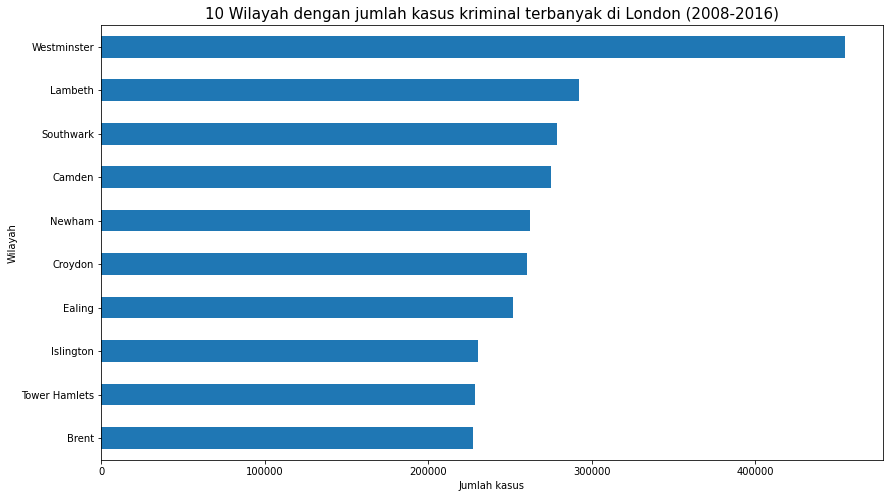

In [10]:
df3.tail(10).plot(kind='barh',figsize =(14,8))
plt.title("10 Wilayah dengan jumlah kasus kriminal terbanyak di London (2008-2016)",fontsize=15)
plt.ylabel("Wilayah")
plt.xlabel("Jumlah kasus")

plt.show()

In [11]:
df3.loc[df3.loc[:]==df.groupby(['borough'],sort=True)['value'].sum().max()]

borough
Westminster    455028
Name: value, dtype: int64

Ternyata setelah divisualisasikan, wilayah dengan catatan kasus kriminal tertinggi berada di wilayah **Westminster** dengan total kasus sebanyak **455028** kasus kriminal sepanjang 2008-2016. Sedangkan, wilayah dengan kasus kriminal yang paling sedikit terdapat pada wilayah Pusat Kota London.

### 2. Bagaimana Distribusi Jumlah Kasus di Wilayah Westminster

Setelah kita mengetahui wilayah dengan kasus kriminal tertinggi, langakah selanjutnya adalah mencari tahu bagaimana persebaran **"Jumlah kasus bulanan"** yang terjadi di Westminster selama tahun 2008-2016. <br>
Untuk memulainya, kita bisa mencoba menghitung frekuensi tiap "jumlah kasus" yang muncul pada kolom bulan. 

In [12]:
df_counting = df[df['borough']=="Westminster"]['value'].value_counts()
df_counting

0      256590
1       57206
2       21526
3        9886
4        5119
        ...  
243         1
188         1
228         1
254         1
218         1
Name: value, Length: 246, dtype: int64

Ternyata jumlah kasus bulanannya bervariasi dari 0 atau tidak ada kasus hingga jumlah kasus lebih dari 250 kasus per bulannya. Untuk memastikan data yang kita ambil benar, maka kita bisa memvalidasi dengan mengalikan frekuensi kemunculan dengan nilai yang muncul.

In [13]:
c=[]
for i in range(len(df_counting)):
    c.append(df_counting.values[i]*df_counting.index[i])
sum(c)

455028

In [14]:
print("Rata Rata kasus per bulan:",round(sum(c)/len(c))," kasus")

Rata Rata kasus per bulan: 1850  kasus


Ternyata jumlahnya sama dengan hasil hitung di poin sebelumnya, yaitu sejumlah 455028 kasus. Dengan rata rata kasus di angka 1850 kasus.<br>
Selanjutnya kita mulai memetakan persebaran frekuensi jumlah kasus kriminal perbulan. Pada kasus ini kita coba menggunakan visualisasi **boxplot**.

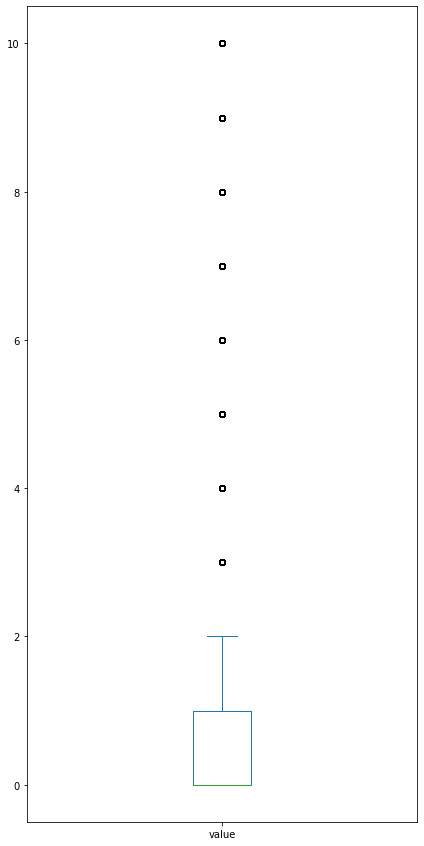

In [15]:
df[(df['borough']=="Westminster")&(df['value']<=10)]['value'].plot(kind='box', figsize=[7,15])
plt.show()

Ternyata frekuensi jumlah kasus kriminal tiap bulan sangat **positive skewed** sehingga visualisasi dengan boxplot masih belum memberikan visualisasi yang cukup baik. Untuk itu kita bisa coba menggunakan visualisasi **Histogram**.

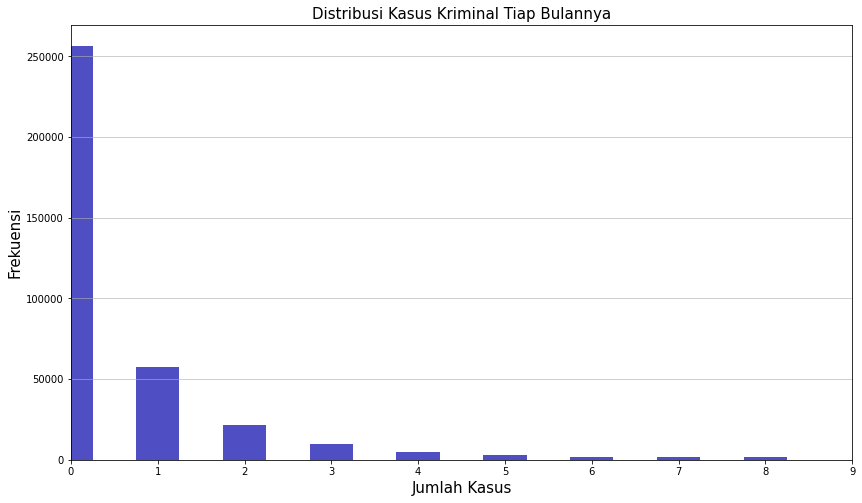

In [16]:
df5 = df[df['borough']=="Westminster"]['value']
hist, bin_edges = np.histogram(df5,bins=range(10))
plt.figure(figsize=[14,8])
plt.bar(bin_edges[:-1], hist, width = 0.5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Jumlah Kasus',fontsize=15)
plt.ylabel('Frekuensi',fontsize=15)
plt.title('Distribusi Kasus Kriminal Tiap Bulannya',fontsize=15)
plt.show()

Setelah kita visualkan dengan histogram, ternyata dapat memvalidasi hasil visualisasi boxplot bahwa distribusi frekuensi jumlah kasus kriminal di wilayah **Westminster** membentuk skewness **Right-Skewness** atau **Positive Skewed**

### 3. Bagaimana Proporsinya jika dibandingkan dengan Wilayah Lain di Kota London?

Selanjutnya, setelah kita mengetahui bahwa Westminster adalah wilayah dengan kasus kriminal paling tinggi. Lantas bagaimana sebenarnya proporsinya jika dibandingkan seluruh kasus kriminal di London? untuk mengetahuinya kita bisa menyiapkan datanya dengan mengambil data kasus di ***Westminster***, juga data kasus di **seantero London kecuali kasus dari Wesminster**.

In [17]:
kasus_west = df[(df['borough']=="Westminster")].groupby('year')['value'].sum().values
kasus_ldn = df[(df['borough']!="Westminster")].groupby('year')['value'].sum().values
idxkasus = df[(df['borough']!="Westminster")].groupby('year')['value'].sum().index
df_prop = pd.DataFrame({ 'london':kasus_ldn,'westminster':kasus_west},index=idxkasus)
df_prop.transpose()

year           2008    2009    2010    2011    2012    2013    2014    2015  \
london       690795  668758  667208  670672  678103  632555  632619  664229   
westminster   47846   48456   48116   54243   59226   53852   47564   47395   

year           2016  
london       687791  
westminster   48330

Setelah kita mendapat hasilnya, kita bisa memvisualisasikannya. Karena yang ingin kita lihat adala proporsinya amak kita bisa memvisualisasikannya dengan **Area Plot** ksususnya menggunakan **Stacked Area Plot**.

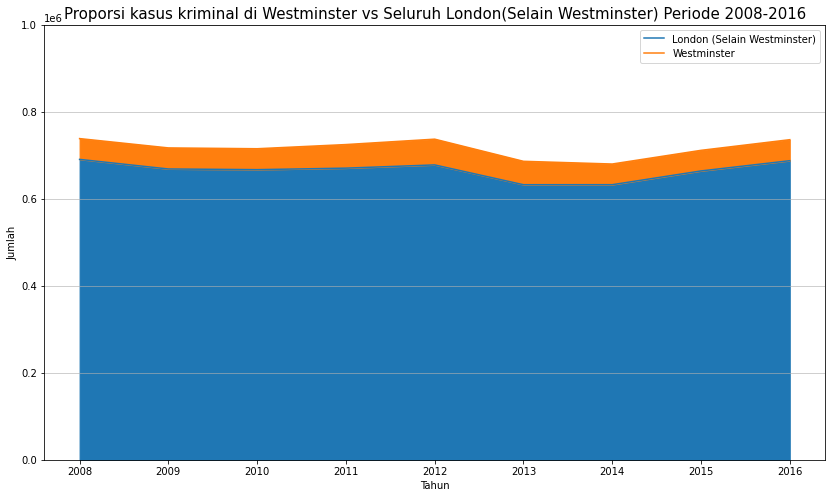

In [18]:
df_prop.plot(kind='area',figsize=(14,8),stacked=True)
plt.title('Proporsi kasus kriminal di Westminster vs Seluruh London(Selain Westminster) Periode 2008-2016',fontsize=15)
plt.ylabel('Jumlah')
plt.legend(['London (Selain Westminster)','Westminster'],loc='upper right')
plt.xlabel('Tahun')
plt.ylim(0,1000000)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [19]:
print("Persentase London =",(sum(df_prop.iloc[:,0])/(sum(df_prop.iloc[:,1])+sum(df_prop.iloc[:,0]))*100),"%")
print("Persentase London =",(sum(df_prop.iloc[:,1])/(sum(df_prop.iloc[:,1])+sum(df_prop.iloc[:,0]))*100),"%") 

Persentase London = 92.94284928187442 %
Persentase London = 7.0571507181255875 %


Ternyata setelah divisualkan, dapat kita lihat bahwa kasus kriminal di Westminster, menyumbang sekitar **7% kasus Kriminal di seluruh London**. <br> Mengingat begitu menariknya wilayah Westmisnter ini, analisis selanjutnya akan kita coba **fokuskan pada kota Westminster**.

### 4. Bagaimana Criminal Cases Trend di Westminster? 

Untuk menjawab pertanyaan ini, kita bisa langusng melakukan grouping data per-tahun untuk wilayah Wesmintster saja.

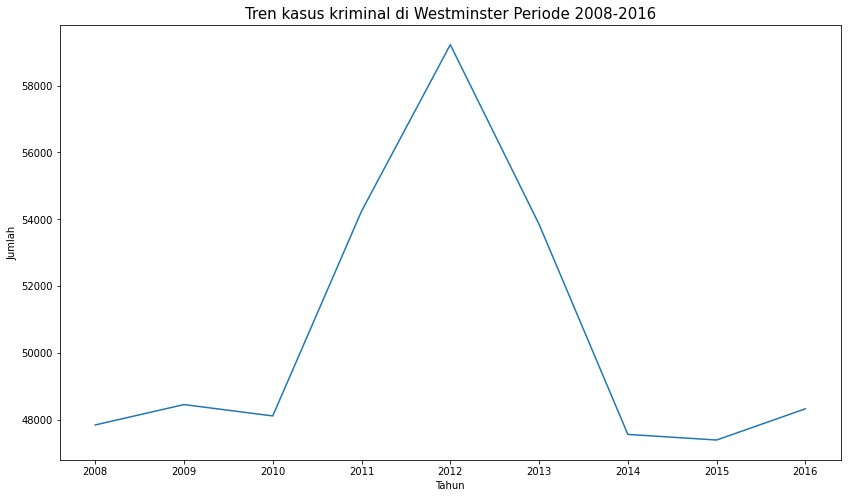

In [20]:
df[(df['borough']=="Westminster")].groupby('year')['value'].sum().plot(figsize=(14,8))
plt.title('Tren kasus kriminal di Westminster Periode 2008-2016',fontsize=15)
plt.ylabel('Jumlah')
plt.xlabel('Tahun')
plt.show()

Setelah dipetakan, ternyata hasilnya cukup mengejutkan. Tren kasus kriminal pada Wilayah Westminster naik dan turun terutama pada periode 2010 - 2014 dengan Puncak dari tren kasus kriminal di Wilayah ini terjadi pada tahun **2012** dengan lebih dari **59.000** Kasus dalam satu tahun.  

### 5. Pada tahun 2012 terdapat peningkatan yang cukup tinggi di hampir mencapai 60K, Bagaimana perbandingannya dengan Daerah Lain?

Jika pada tahun 2012 kasus kriminal di Westmminster sangat tinggi, lantas bagaimana dengan daerah lain? apakah memiliki kasus setinggi ini juga? Untuk menjawabnya kita bisa coba memvisualkannya menggunakan visualisasi **Geospasial**.
Sebelum itu, kita akan siapkan data geospasial untuk wilayah wilayah yang ada di London.

In [19]:
# bisa geojson bsia di download
# !wget --quiet https://skgrange.github.io/www/data/london_boroughs.json
    
# print('GeoJSON file downloaded!')

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


Pertama tama kita siapkan data tiap wilayahnya ke dalah sebauh dataframe

In [21]:
mapval = df[(df['year']==2012)].groupby('borough')['value'].sum().values
mapidx = df[(df['year']==2012)].groupby('borough')['value'].sum().index
df_map = pd.DataFrame({'borough':mapidx,'total':mapval})

Kemudian kita lakuakn visualisasi dengan bantuan library **folium**, dengan menyiapkan data geospasial, map, dan mempersiapkan object peta berjenis Choropleth. Agar kita bisa membaca datanya dengan lebih baik, kita juga akan menambahkan **Tooltip** nama Wilayah jika kita rahkan kursor pada wilayah tertentu.

In [24]:
ldn_geo = r'london_boroughs.json'

ldn_map = folium.Map(location=[51.519763556894745, -0.12634439046901913], zoom_start=10,tiles='Stamen Toner')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
cloro = folium.Choropleth(
    geo_data=ldn_geo,
    data=df_map,
    columns=['borough', 'total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Data Kasus Kriminal di London 2012'
).add_to(ldn_map)

folium.LayerControl().add_to(ldn_map)
# Display Region LabelC
cloro.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)


ldn_map

Ternyata hanya Westminster saja yang angka kejahatannya mencapai **lebih dari 50 ribu kasus dalam setahun**. Wilayah lain hanya berada di angka **kurang dari 40 ribu kasus** per tahunnya. Hal ini cukup menarik, mengingat letak Wesminster yang bersebelahan dengan Wilayah "City of London" yang merupakan wilayah dengan jumlah kejahatan paling kecil.

### 6. Bagaimana pergerakan kasus kriminal pada tahun 2012 tiap bulannya?

Setelah mengetahui bahwa pada tahun 2012 menjadi puncak jumlah kasus kriminal di wilayah Westminster, selanjutnya kita akan mencari tahu lebih lanjut bagaimana pergerakan jumlah kasus tiap bulannya. <br>
Pertama tama tentus siapkan data di kota Westminster pada tahun 2012 saja. Kemudian kita coba visualisasikan dengan lIne Plot sederhana.

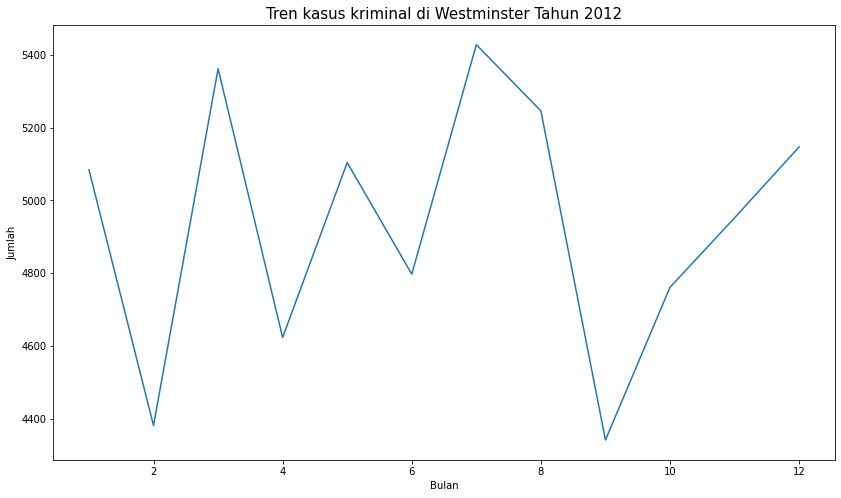

In [25]:
df[(df['borough']=="Westminster")&(df['year']==2012)].groupby('month')['value'].sum().plot(figsize=(14,8))
plt.title('Tren kasus kriminal di Westminster Tahun 2012',fontsize=15)
plt.ylabel('Jumlah')
plt.xlabel('Bulan')
plt.show()

Ternyata, pertumbuhan kasus kriminal di Wilayah Westminster tidak stagnan memuncak atau menurun, tetapi cukup fluktuatif dan bisa sangat rendah atau sangat tinggi pada bulan bulan ternentu. Pada thaun 2012 angka tertinggi tercatat pada bulan Juli, dengan jumlah **lebih dari 5400 kasus**.

### 7. Kenapa Kasus Meningkat Pada Bulan Bulan Tertentu? dan Menurun Pada Bulan Bulan Tertentu? Apakah Jumlah Kasus dipengaruhi oleh Bulan?

Untuk melihat hal ini, kita akan coba untuk memetakannya secara umum pada periode 2008 - 2016 menggunakan **scatter plot**. Tetapi sebleumnya ktia siapkan dataframe yang akan digunakan untuk sumber data.

In [26]:
monthval = df[(df['borough']=="Westminster")].groupby('month')['value'].sum().values
monthidx = df[(df['borough']=="Westminster")].groupby('month')['value'].sum().index

df_month = pd.DataFrame({'month':monthidx,'value':monthval})

Setelah data disiapkan, selanjutnya barulah kita lakukan visualisasi pada data tersebut.

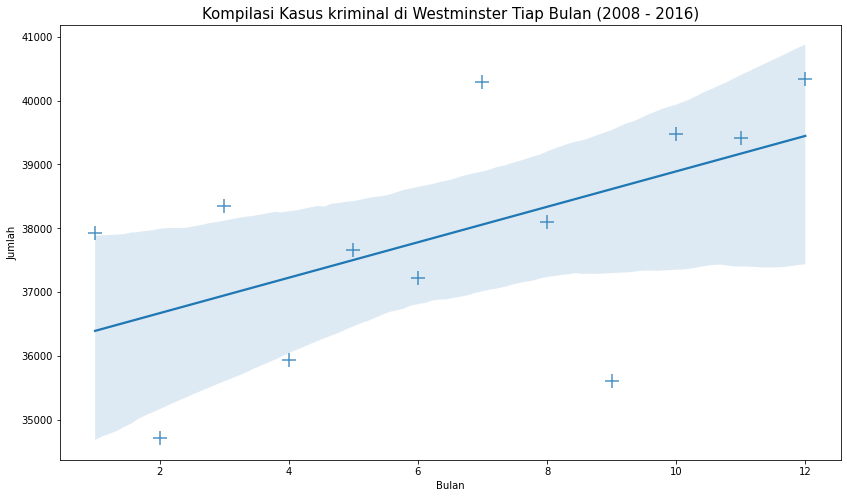

In [27]:
#Scatter Plot
plt.figure(figsize=(14,8))
ax = sns.regplot(x='month', y='value', data=df_month, marker='+', scatter_kws={'s':200})



plt.title('Kompilasi Kasus kriminal di Westminster Tiap Bulan (2008 - 2016)',fontsize=15)
plt.ylabel('Jumlah')
plt.xlabel('Bulan')
plt.show()

Ternyata pola yang sama terjadi secara umum pada periode 2008 - 2016, dimana kasus akan cenderung **turun di awal tahun** dan **semakin tinggi ke akhir tahun**, dimana puncaknya akan terdapat **kasus terbanyak** pada bulan **Juli dan Desember**.


### 8. Kasus Mayor Apa Yang Sering terjadi di Tahun 2012?

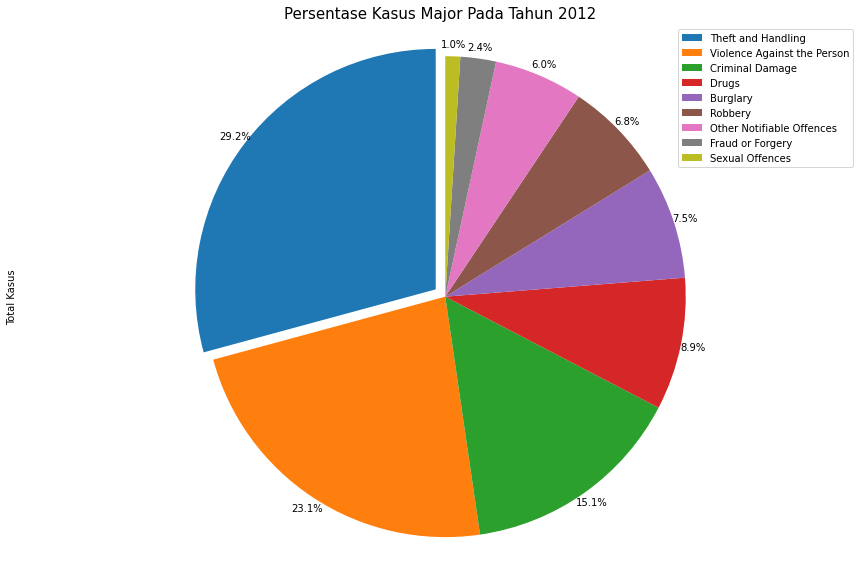

In [28]:
xpld = [0.05,0,0,0,0,0,0,0,0]
df[(df['year']==2012) & (df['borough']=='Westminster')]['major_category'].value_counts().plot(kind='pie',
                            figsize=(15,10),
                            autopct='%1.1f%%',
                            startangle=90,
                            labels = None,
                            pctdistance =1.05,
                            explode = xpld
                            )

plt.title("Persentase Kasus Major Pada Tahun 2012",fontsize=15)
plt.axis('equal')
plt.ylabel('Total Kasus')
plt.legend(labels=df[df['year']==2012]['major_category'].value_counts().index, loc='upper right')

plt.show()


Untuk jenis kejahatan yang paling sering terjadi pada kasus mayor adalah kejahatan "Theft and Handling" dengan persentase di **angka 29.2%**. Sepertinya kita harus lebih hati hati dalam memperlakukan barang barang pribadi kita.

### 9. Bagaimana dengan Kasus Minor?

Lalu bagaimana dengan kasus minor? Karena macam kategorinya cukup banyak, akan tidak terlalu bagus jika ditampilkan dalam bentuk Pie Chart. Oleh karena itu saya akan mencoba untuk mencari jawabannya dengan menggunakan visualisasi WordCloud. Agar lebih *aestethic* saya akan masking dengan peta London.

Hal pertama yang harus dilakukan adalah menyiapkan data untuk kategori minor yang ada. Setelah didapat kemudian data yang terdiri dari lebih dari 1 kata akan digabungkan, karena tujuan visualisasi ini adalah mencari "Kategori" bukan mencari sebuah tren dari suatu "kata". Karenanya kita akan jadikan satu kata tiap kategori.

In [29]:
#Word Cloud
listofminor = list(df[(df['year']==2012) & (df['borough']=='Westminster')]['minor_category'].values)

for i in range(len(listofminor)):
    listofminor[i] = listofminor[i].replace(" ","")

listofminor[:5]


['HandlingStolenGoods',
 'OtherSexual',
 'CriminalDamageToOtherBuilding',
 'OtherTheft',
 'AssaultwithInjury']

Setelah data diproses kedalam satu kata, selanjutnya kita kumpulkan semua data dalma satu list agar bisa langsung di generate menggunakan **WordCloud**.

In [30]:
listwc = " ".join(listofminor)

Langkah terakhir adalah melakukan maskig dengan gambar peta londong, kemudian menampilkan visualisasi WordCloud pada data yang sudah disiapkan.

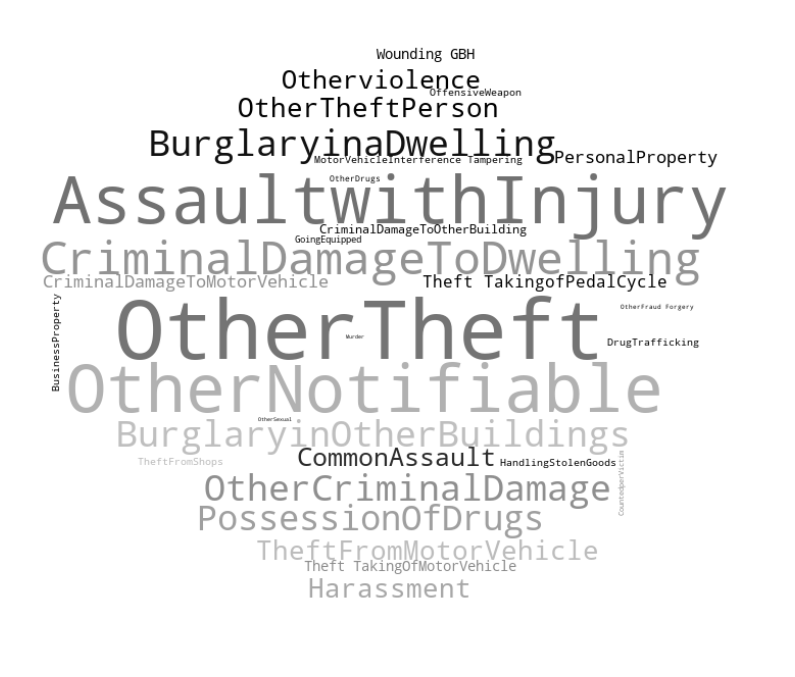

In [31]:
london_mask = np.array(im.open("london.jpg"))
                      
minor_wc = WordCloud(
    background_color='white',
    max_words=2000,
    mode="RGBA",
    mask=london_mask
)
minor_wc.generate(listwc)
image_colors = ImageColorGenerator(london_mask)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(minor_wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()


Ternyata hasil visualisasi wordcloud menghasilkan kesimpulan bahwa kejahatan kategori minor yang sering terjadi di wilayah Westminster adalah kejahatan berjenis "Other Theft".

### Kesimpulan

Berdasarkan hasil eksplorasi dataset London Criminal Case, dapat kita simpulkan bahwa wilayah **Wesminster menjadi lokasi dengan jumlah kasus kriminal paling tinggi dan paling beragam, terlebih di tahun 2012**. Meski ironisnya letak wilayah ini **bersebelahan dengan Wilayah dengan kasus kriminal paling kecil di London, yaitu "City of London"**. <br>
Dataset Criminal Case ini sangatlah menarik untuk dieksplorasi lebih jauh lagi, mengingat eksplorais yang kita lakukan saat ini banyak berfokus pada Wlayah yang ada di London, dan belum mengarah ke Wilayah kerja Kepolisiannya. <br>
Penulis berharap bisa mendapatkan kesempatan untuk melakukan analisis lebih lanjut lagi pada kesempatan lainnya.

### Terima Kasih